<a href="https://colab.research.google.com/github/ContainerWhale/IT1244_data/blob/main/Code/main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !rm -rf IT1244_data
!git clone https://github.com/ContainerWhale/IT1244_data.git

Cloning into 'IT1244_data'...
remote: Enumerating objects: 257, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 257 (delta 5), reused 0 (delta 0), pack-reused 226
Receiving objects: 100% (257/257), 5.70 MiB | 20.00 MiB/s, done.
Resolving deltas: 100% (7/7), done.


In [2]:
# Download the first Python file from GitHub
!wget https://raw.githubusercontent.com/ContainerWhale/IT1244_data/main/Code/CNNModel.py

# Download the second Python file from GitHub
!wget https://raw.githubusercontent.com/ContainerWhale/IT1244_data/main/Code/Symmetry.py

# Now you can import the files
import CNNModel
import Symmetry

--2024-03-19 10:57:26--  https://raw.githubusercontent.com/ContainerWhale/IT1244_data/main/Code/CNNModel.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3817 (3.7K) [text/plain]
Saving to: ‘CNNModel.py’

CNNModel.py         100%[===================>]   3.73K  --.-KB/s    in 0s      

2024-03-19 10:57:26 (55.0 MB/s) - ‘CNNModel.py’ saved [3817/3817]

--2024-03-19 10:57:26--  https://raw.githubusercontent.com/ContainerWhale/IT1244_data/main/Code/Symmetry.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8242 (8.0K) [text/plain]


In [3]:
from CNNModel import CNNModel
from Symmetry import get_sym

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import glob
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import cv2
from sklearn.model_selection import train_test_split

In [5]:
yes_path = "/content/IT1244_data/Brain Tumor/data/malignant/*.jpg"
no_path = "/content/IT1244_data/Brain Tumor/data/benign/*.jpg"

yes, no = [], []
for f in glob.iglob(yes_path):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    yes.append(img)

for f in glob.iglob(no_path):
    img = cv2.imread(f)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128))
    no.append(img)





In [6]:
X_img = np.array(yes + no)
X_sym = np.array(get_sym(X_img))
X_sym = np.expand_dims(X_sym, axis=1)
y = np.array([1 if i < len(yes) else 0 for i in range(len(yes)+len(no))])


In [7]:
def generate_train_val_assignment(length, test_size, seed = None):
    '''
    Test: 0
    Train: 1
    '''

    test_length = length * test_size // 1
    arr = np.array([0 if i < test_length else 1 for i in range(length)])
    if seed:
        np.random.seed(seed)
    np.random.shuffle(arr)

    return arr

In [18]:
assignment = generate_train_val_assignment(len(X_img), 0.4, 1244)
X_train_img, X_train_ftr, y_train = X_img[assignment == 1], X_sym[assignment == 1], y[assignment == 1]
X_val_img, X_val_ftr, y_val = X_img[assignment == 0], X_sym[assignment == 0], y[assignment == 0]

In [19]:
print(X_img.shape)
print(X_train_img.shape)
print(X_val_img.shape)

(231, 128, 128, 3)
(139, 128, 128, 3)
(92, 128, 128, 3)


In [20]:
model = CNNModel("VGG16", X_train_img, X_val_img, y_train, y_val, X_train_ftr, X_val_ftr)
history = model.run_model(25, 16)

Epoch 1/25
9/9 [==============================] - 2s 86ms/step - loss: 2.8328 - accuracy: 0.5180 - val_loss: 1.6492 - val_accuracy: 0.6630
Epoch 2/25
9/9 [==============================] - 0s 39ms/step - loss: 2.3834 - accuracy: 0.6403 - val_loss: 0.9586 - val_accuracy: 0.6848
Epoch 3/25
9/9 [==============================] - 0s 41ms/step - loss: 1.5571 - accuracy: 0.6187 - val_loss: 0.7662 - val_accuracy: 0.7283
Epoch 4/25
9/9 [==============================] - 0s 40ms/step - loss: 1.2645 - accuracy: 0.6835 - val_loss: 0.8710 - val_accuracy: 0.7174
Epoch 5/25
9/9 [==============================] - 0s 41ms/step - loss: 1.3834 - accuracy: 0.6978 - val_loss: 0.7642 - val_accuracy: 0.7826
Epoch 6/25
9/9 [==============================] - 0s 48ms/step - loss: 0.7712 - accuracy: 0.7842 - val_loss: 0.6675 - val_accuracy: 0.7717
Epoch 7/25
9/9 [==============================] - 0s 46ms/step - loss: 0.8872 - accuracy: 0.7842 - val_loss: 0.6312 - val_accuracy: 0.7826
Epoch 8/25
9/9 [===========

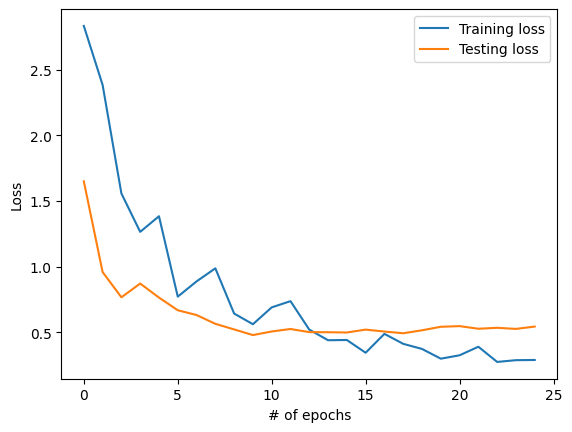

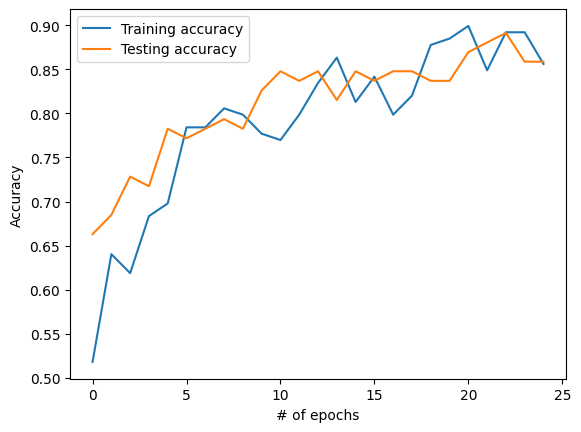

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(history.history)

# History for loss
ax = df[["loss", "val_loss"]].plot()
ax.legend(["Training loss", "Testing loss"])
plt.xlabel("# of epochs")
plt.ylabel("Loss")
plt.show()


# History for accuracy
ax = df[["accuracy", "val_accuracy"]].plot()
ax.legend(["Training accuracy", "Testing accuracy"])
plt.xlabel("# of epochs")
plt.ylabel("Accuracy")
plt.show()
## end

3/3 [==============================] - 0s 32ms/step
Confusion Matrix:
[[23 10]
 [ 3 56]]


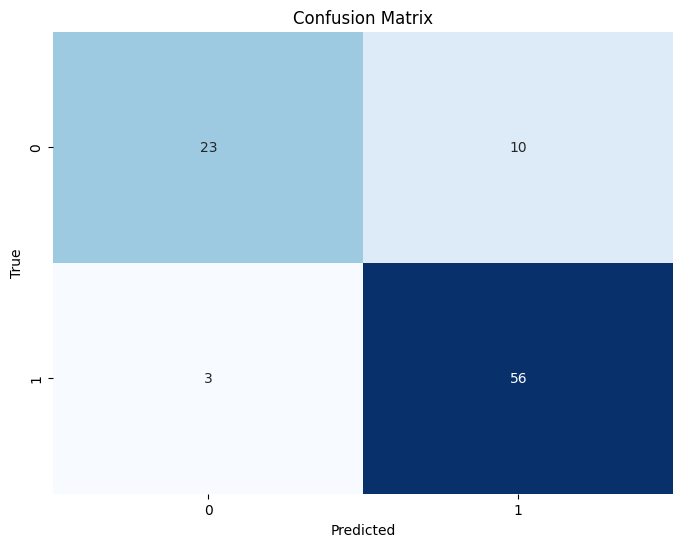

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Make predictions on the test data
model = model.get_model()
y_pred = model.predict([X_val_img, X_val_ftr])[:,0]
y_pred_classes = (y_pred > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_classes)

# Print the confusion matrix as a table
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [23]:
# Accuracy
print((cm[0,0] + cm[1,1]) / np.sum(cm))
# Miss rate
print((cm[1,0]/np.sum(cm[1,:]))) #Verify that this is correct, I changed it.

0.8586956521739131
0.05084745762711865


In [1]:
# False negatives (miss)
indices = (y_pred < 0.5) * (y_val > 0.5)
FN = X_val_img[indices]
# FN = FN * 255
FN = FN.astype(int)
# print(X_val_sym[indices])

plt.figure(figsize=(16,9))
for i in range(len(FN)):
    plt.subplot(1, len(FN), i+1)
    plt.title("FN")
    plt.imshow(FN[i])

NameError: name 'y_pred' is not defined

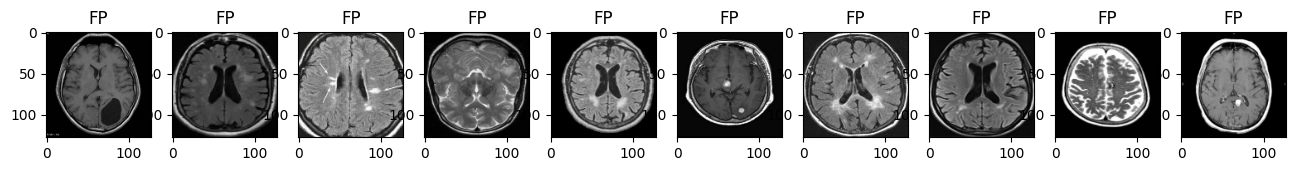

In [25]:
# False positives (false alarm)
indices = (y_pred > 0.5) * (y_val < 0.5)
FP = X_val_img[indices]
# FP = FP * 255
FP = FP.astype(int)

plt.figure(figsize=(16,9))
for i in range(len(FP)):
    plt.subplot(1, len(FP), i+1)
    plt.title("FP")
    plt.imshow(FP[i])